
# Assignment 0

## Regularization 1.1

Using the accompanying Hitters dataset (found here (Links to an external site.)Links to an external site.), we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors).

1.1.1. Create a visualization of the coefficient trajectories

1.1.2. Comment on which are the final three predictors that remain in the model

1.1.3. Use cross-validation to find the optimal value of the regularization penalty

1.1.4. How many predictors are left in that model?



### 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors).

In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import *


# read in data
hitters_df = pd.read_csv("Hitters.csv", index_col = 0)
#hitters_df[0:5]
# drop categorical variables
df = hitters_df.dropna().drop(['League','Division','NewLeague'], axis=1)
#df[0:5]
# get X and Y
X = df.drop(['Salary'], axis=1)
Y = df['Salary']

lasso_reg = Lasso(normalize=True)

lasso_reg.fit(X,Y)

lasso_reg.coef_

pred = lasso_reg.predict(X)

mse = np.mean((pred - Y)**2)

print('mse:',mse)

lasso_reg.score(X,Y)


mse: 108955.42067407088


0.4625702841142737

### 1.1.1. Create a visualization of the coefficient trajectories

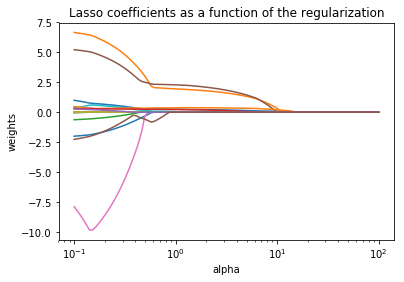

In [2]:


import matplotlib.pyplot as plt

# get an alphas array
alphas = 10**np.linspace(2,-1,100)

lasso = Lasso(normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()


In [3]:
coefs[0] # all zeros

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.])

### 1.1.2. Comment on which are the final three predictors that remain in the model

After running the code below, we can know the final three predictors that remain in the model are **Hits, CRuns, and CRBI.**


In [4]:

print(coefs[33])
df.columns

[ 0.          0.32947459  0.          0.          0.          0.          0.
  0.          0.          0.          0.07632197  0.20447492  0.          0.
  0.          0.        ]


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')

### 1.1.3. Use cross-validation to find the optimal value of the regularization penalty

In [5]:
lasso_cv = LassoCV(alphas = alphas, normalize = True)
lasso_cv.fit(X, Y)
print('Best alpha:', lasso_cv.alpha_)

lasso_best_alpha = Lasso(alpha = lasso_cv.alpha_, normalize = True)
lasso_best_alpha.fit(X, Y)
mse = np.mean((Y-lasso_best_alpha.predict(X))**2)
print('mse:',mse)
pd.Series(lasso_best_alpha.coef_, index = X.columns)

Best alpha: 0.247707635599
mse: 99837.74604435197


AtBat     -1.388944
Hits       5.449126
HmRun     -0.000000
Runs       0.000000
RBI        0.084933
Walks      4.204282
Years     -7.343615
CAtBat    -0.000000
CHits      0.000000
CHmRun     0.455743
CRuns      0.582623
CRBI       0.326858
CWalks    -0.363319
PutOuts    0.271797
Assists    0.120669
Errors    -1.197745
dtype: float64

### 1.1.4. How many predictors are left in that model?

**Answer: ** Total 12 predictors are left in the model. 

## Regularization 1.2

Using the accompanying Hitters dataset (found here (Links to an external site.)Links to an external site.), we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

1.2 Repeat with Ridge Regression. 

1.2.1 Visualize the coefficient trajectories

1.2.2 Use cross-validation to find the optimal value of the regularization penalty



### 1.2 Repeat with Ridge Regression.

In [6]:

ridge_reg = Ridge(normalize=True)

ridge_reg.fit(X,Y)

ridge_reg.coef_

pred = ridge_reg.predict(X)

mse = np.mean((pred - Y)**2)

print('mse:',mse)

ridge_reg.score(X,Y)

mse: 113890.20436157893


0.43822914184959982

### 1.2.1 Visualize the coefficient trajectories

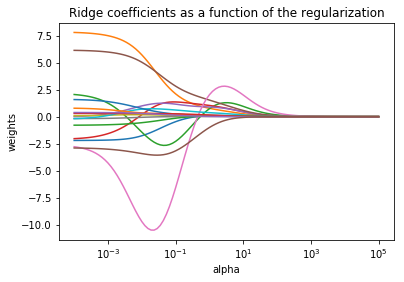

In [7]:

# get an alphas array
alphas = 10**np.linspace(5,-4,100)

ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()


In [8]:
coefs[0] # not all zeros

array([  1.20887460e-05,   4.38516332e-05,   1.76695542e-04,
         7.41561815e-05,   7.83318832e-05,   9.21924200e-05,
         3.77020075e-04,   1.03793100e-06,   3.81989337e-06,
         2.88072395e-05,   7.66355957e-06,   7.90896152e-06,
         8.36757366e-06,   4.84208532e-06,   7.90883857e-07,
        -3.68819982e-06])

### 1.2.2 Use cross-validation to find the optimal value of the regularization penalty

In [9]:
ridge_cv = RidgeCV(alphas = alphas, normalize = True)
ridge_cv.fit(X, Y)
print('Best alpha:', ridge_cv.alpha_)


ridge_best_alpha = Ridge(alpha = ridge_cv.alpha_, normalize = True)
ridge_best_alpha.fit(X, Y)
mse = np.mean((Y-ridge_best_alpha.predict(X))**2)
print('mse:',mse)
pd.Series(ridge_best_alpha.coef_, index = X.columns)

Best alpha: 0.01
mse: 97322.52475362852


AtBat     -1.765114
Hits       5.714498
HmRun     -1.429366
Runs       0.181913
RBI        0.993351
Walks      5.033247
Years     -9.697173
CAtBat    -0.060149
CHits      0.176663
CHmRun     0.694756
CRuns      0.754426
CRBI       0.348509
CWalks    -0.556707
PutOuts    0.289648
Assists    0.299294
Errors    -3.412725
dtype: float64

## Short Answer

2.1 Explain in your own words the bias-variance tradeoff

2.2 What role does regularization play in this tradeoff? 

2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance


### 2.1 Explain in your own words the bias-variance tradeoff

**Answer: ** When a model is very flexible, which means that it has really high variance, then this model will have pretty low bias since it's flexible enough to follow the data trend. However, when a model is not very flexible, which means that it has low variance, then this model will have quite high bias because of its inflexibility.  


### 2.2 What role does regularization play in this tradeoff?

**Answer: ** When bias is very low and variance is very high, it is likely that your model is overfitting. However, regularization can effectively prevent overfitting. Including regularization while training the model, the model won't be too flexible with high variance and low bias. Instead, regularization will help to find the best point to stop increasing flexibility to avoid overfitting.  


### 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

**Answer: ** Looking at two plots of **coefficients as a function of the regularization**, when the regularization parameter is small, all coefficients are quite large, which means that the model has high variance and at the same time, it has pretty low bias. However, the model might be overfitting. When the regularization parameter is large, all coefficients become smaller, which means that the model has low variance and at the same time, it has relatively high bias. 

